* 시각화 라이브러리
1. matplotlib

    파이썬으로 기본적인 차트들을 쉽게 그릴 수 있도록 도와주는 시각화 라이브러리
2. seaborn

    matplotlib 기반으로 만들어진 통계 데이터 시각화 라이브러리

# Matplotlib & Seabor 라이브러리를 활용한 데이터 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고무시
import warnings
warnings.filterwarnings('ignore')

# 환경구성
plt.rcParams['figure.figsize']=[10,8] # 크기
sns.set(style='whitegrid') # 그리드
sns.set_palette('pastel') # 색 테마

In [4]:
# Tips 데이터셋 불러오기
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.shape

(244, 7)

## bar 차트 이해 및 제작

In [7]:
# tip 컬럼을 day 기준으로 합하기
sum_tip_by_day = tips.groupby('day')['tip'].sum()
sum_tip_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [8]:
# x 라벨 설정
x_label=['Thur','Fri','Sat','Sun']
x_label_index=np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

### matplotlib을 활용한 시각화

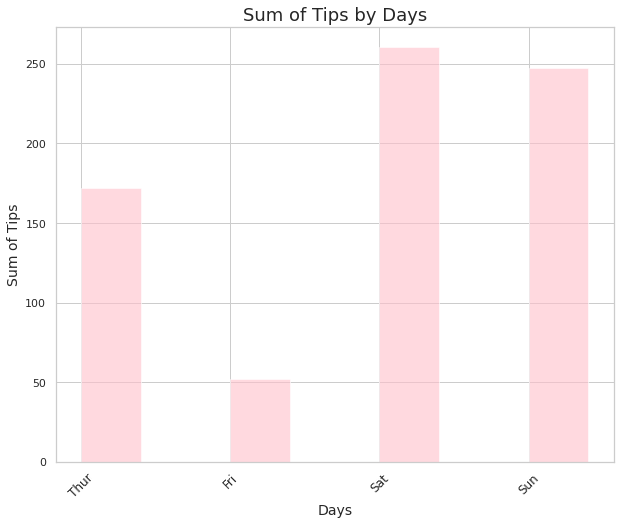

In [23]:
plt.bar(x_label, sum_tip_by_day, # x,y 수가 맞도록 매핑
        color='pink', # 색
        alpha=0.6, # 투명도
        width=0.4, # 넓이
        align='edge') # 배치
plt.title('Sum of Tips by Days',fontsize=18)
plt.xlabel('Days',fontsize=14)
plt.ylabel('Sum of Tips',fontsize=14)
plt.xticks(x_label_index, x_label, rotation=45, fontsize=12)
plt.show()

### seaborn을 활용한 시각화

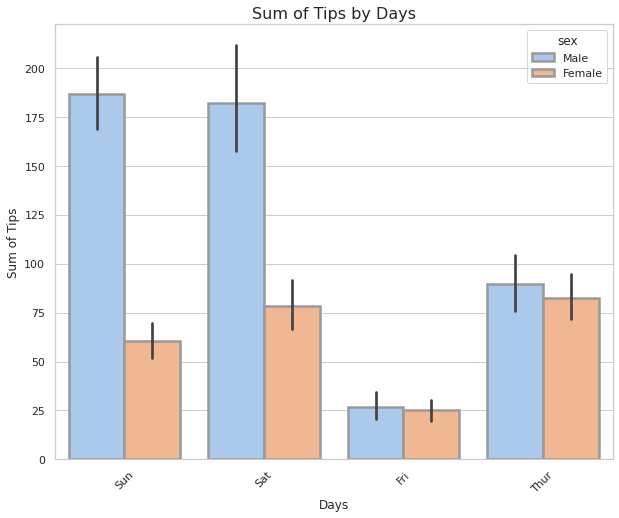

In [32]:
sns.barplot(data=tips, #데이터프레임
            x='day',
            y='tip',
            estimator=np.sum, # tip의 day별 합
            hue='sex', # 색으로 구분해준다.
            order=['Sun','Sat','Fri','Thur'], # x 틱 순서
            edgecolor='.6', # 테두리 선명도
            linewidth=2.5) # 테두리 두께
plt.title('Sum of Tips by Days',fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum of Tips')
plt.xticks(rotation=45)
plt.show()

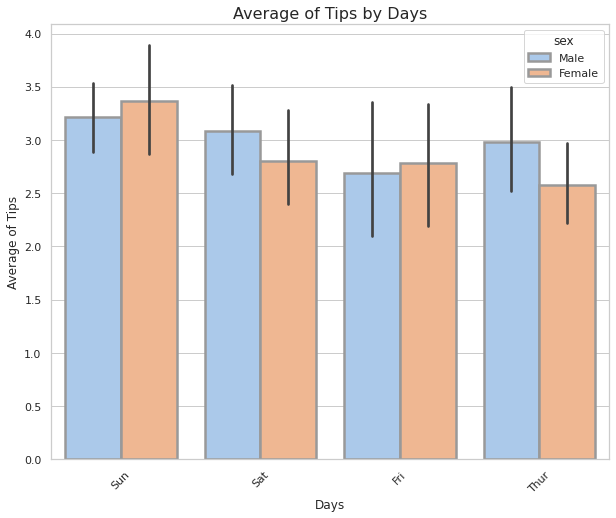

In [34]:
sns.barplot(data=tips, #데이터프레임
            x='day',
            y='tip',
            estimator=np.average, # tip의 day별 합
            hue='sex', # 색으로 구분해준다.
            order=['Sun','Sat','Fri','Thur'], # x 틱 순서
            edgecolor='.6', # 테두리 선명도
            linewidth=2.5) # 테두리 두께
plt.title('Average of Tips by Days',fontsize=16)
plt.xlabel('Days')
plt.ylabel('Average of Tips')
plt.xticks(rotation=45)
plt.show()

## Pie 차트 이해 및 제작

### matplotlib을 활용한 시각화

In [36]:
# 비율 구하기
ratio_tip_by_day = sum_tip_by_day / sum_tip_by_day.sum()
ratio_tip_by_day

day
Thur    0.234875
Fri     0.071024
Sat     0.355942
Sun     0.338159
Name: tip, dtype: float64

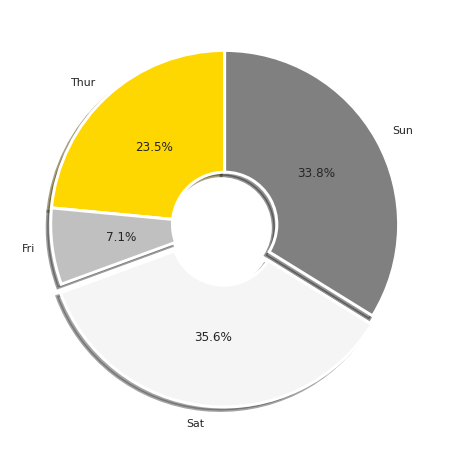

In [45]:
plt.pie(ratio_tip_by_day,
        labels=x_label,
        autopct='%.1f%%', # 소수점 한자리 표시
        startangle=90, # 시작 각도 90도 (12시)
        counterclock=True, # 라벨을 시계방향으로 False=반시계
        explode=[0,0,0.05,0], # 돌출
        shadow=True, # 그림자
        colors=['gold','silver','whitesmoke','gray'], # 색
        wedgeprops={'width':0.7, 'edgecolor':'w','linewidth':3}) # 도넛 모양 크기, 테두리 색, 테두리 두께
plt.show()

## Line 차트 이해 및 제작

In [48]:
# tips 데이터에 가상으로 시간 컬럼 추가하기 - 시계열 그래프 그리기
# 일요일 데이터만 사용
sun_tips = tips[tips['day']=='Sun']
sun_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [ ]:
# 컬럼에 들어갈 날짜 리스트 만들기
import datetime # 현재 서버 시간을 얻기 위해 datetime 라이브러리 사용
date=[]
today=datetime.date.today() 
date.append(today)

for i in range(sun_tips.shape[0]-1): # 오늘 날짜가 이미 추가 됐기 떄문에 1을 빼준다.
    today+=datetime.timedelta(1) # 하루씩 추가
    date.append(today)
date

In [51]:
# 컬럼 추가
sun_tips['date']= date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2022-12-20
1,10.34,1.66,Male,No,Sun,Dinner,3,2022-12-21
2,21.01,3.50,Male,No,Sun,Dinner,3,2022-12-22
3,23.68,3.31,Male,No,Sun,Dinner,2,2022-12-23
4,24.59,3.61,Female,No,Sun,Dinner,4,2022-12-24
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2023-03-01
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2023-03-02
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2023-03-03
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2023-03-04


### matplotlib을 활용한 시각화

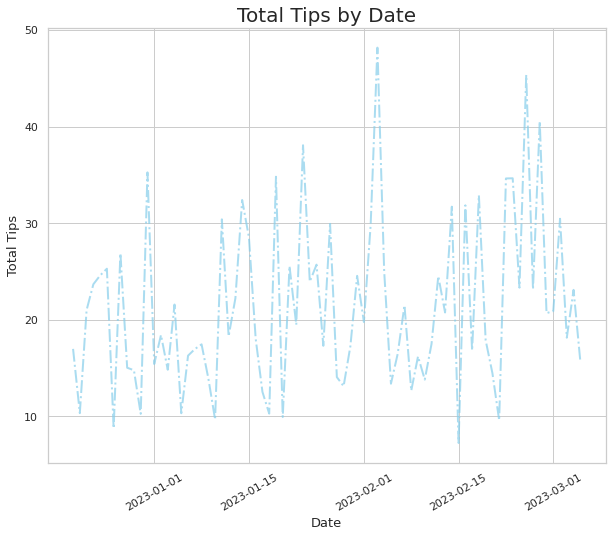

In [58]:
plt.plot(sun_tips['date'],sun_tips['total_bill'],
        linestyle='-.', # 라인 스타일
         linewidth=2, # 라인 두께
         color='skyblue', # 색
         alpha=0.7) # 투명도
plt.title("Total Tips by Date", fontsize=20)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Total Tips", fontsize=13)
plt.xticks(rotation=30)
plt.show()

### seaborn을 활용한 시각화

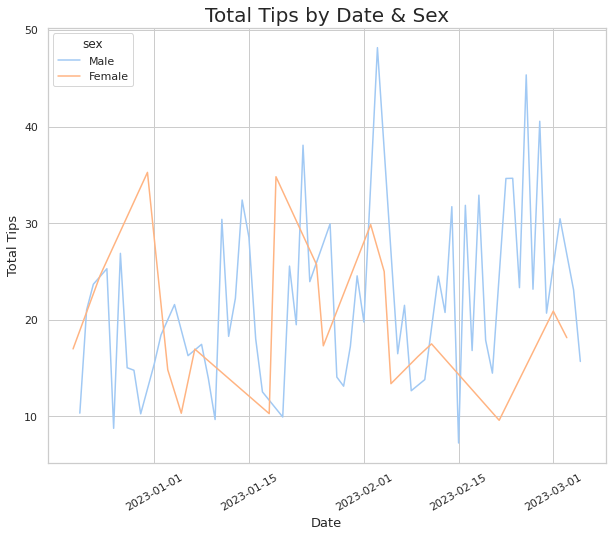

In [61]:
sns.lineplot(data=sun_tips,
             x='date',
             y='total_bill',
             hue='sex') # 여성 데이터가 적다.
plt.title("Total Tips by Date & Sex", fontsize=20)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Total Tips", fontsize=13)
plt.xticks(rotation=30)             
plt.show()

## Scatter 차트 이해 및 제작
* 주로 변수간의 상관관계를 볼 때

### matplotlib을 활용한 시각화

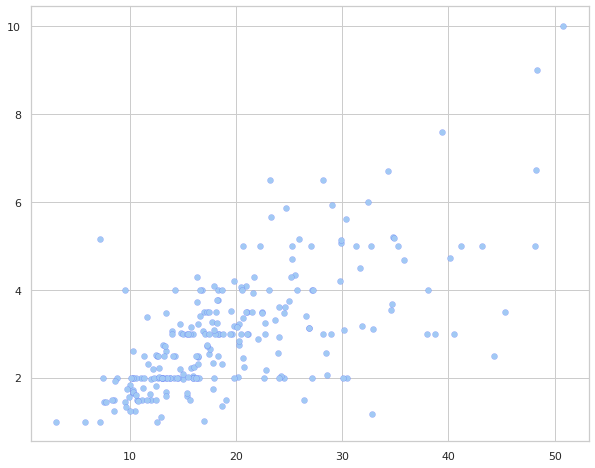

In [65]:
plt.scatter(tips['total_bill'],tips['tip'],
            edgecolor='blue', # 테두리 색
            linewidth=0.1) # 테두리 두께

plt.show()

### seaborn을 활용한 시각화

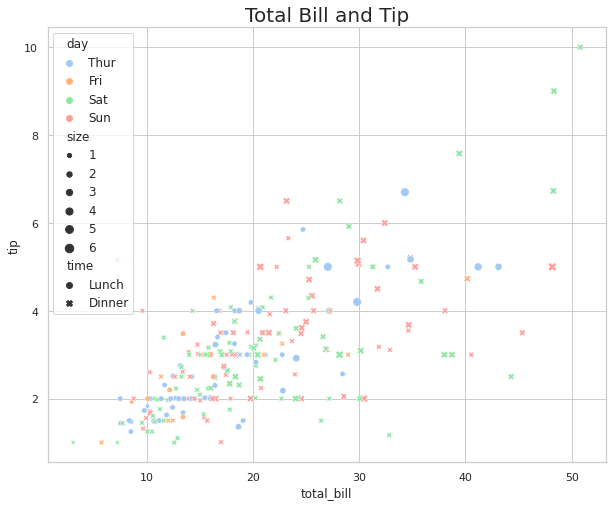

In [70]:
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                style='time', # 모양으로 구분해 준다.
                hue='day', # 색으로 구분해 준다.
                size='size') # 크기로 구분해 준다.
plt.title("Total Bill and Tip", fontsize=20)
plt.show()                

## HeatMap 차트 이해 및 제작
* 주로 변수간의 여러 컬럼들의 상관관계를 볼 때

### seaborn을 활용한 시각화

In [72]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


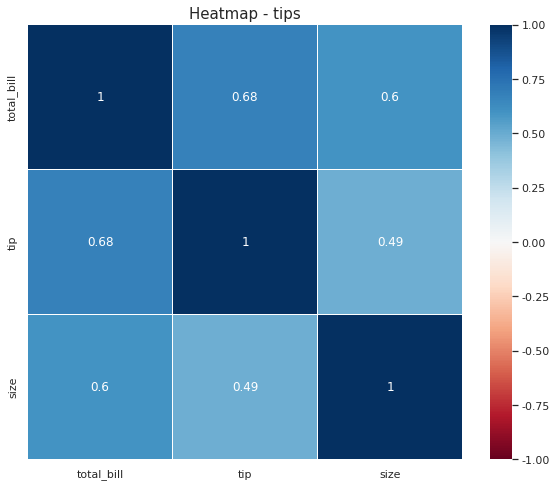

In [76]:
sns.heatmap(tips.corr(), # 수치형 상관관계를 넣어 준다.
            annot=True, # 수치 표시
            square=True, # 정사각형으로
            vmin=-1,vmax=1, # 최대 최소값
            linewidths=.5, # 테두리 선 두께
            cmap='RdBu' # 색 테마
            )
plt.title('Heatmap - tips', fontsize=15)
plt.show()

## Histogram 차트 이해 및 제작
* 변수의 도수분포

### matplotlib을 활용한 시각화

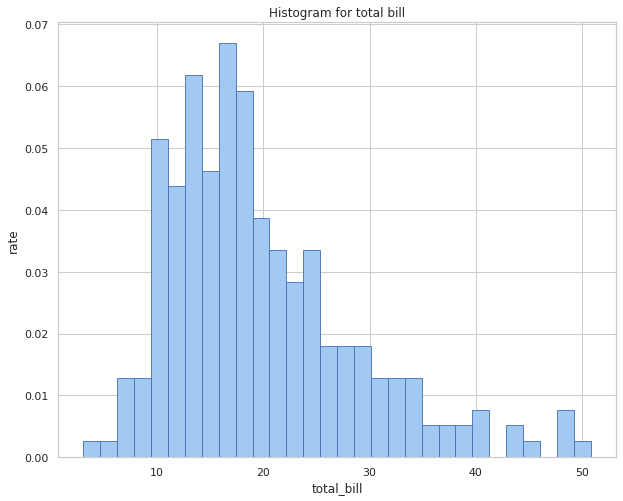

In [82]:
plt.hist(tips['total_bill'], # total_bill 값의 분포
         bins=30, # 막대 개수
         density=True, # 비율
         edgecolor='b', # 테두리 색
         linewidth=0.9) # 테두리 두께
plt.title('Histogram for total bill') 
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

### seaborn을 활용한 시각화

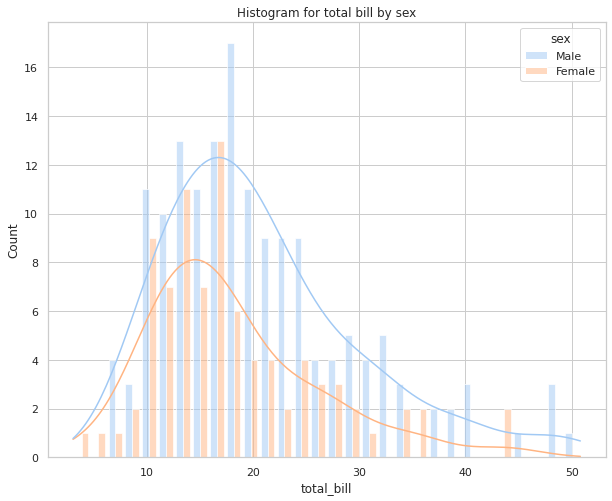

In [90]:
sns.histplot(data=tips,
             x='total_bill',
             bins=30,
             kde=True, # 분포를 매끄럽게 보여주는 선
             hue='sex',
             multiple='dodge', # 겹치지 않도록 stack으로 하면 그 위에 쌓아짐
             shrink=0.8) # 두께
plt.title('Histogram for total bill by sex')
plt.show()

## Box 차트 이해 및 제작

### matplotlib을 활용한 시각화

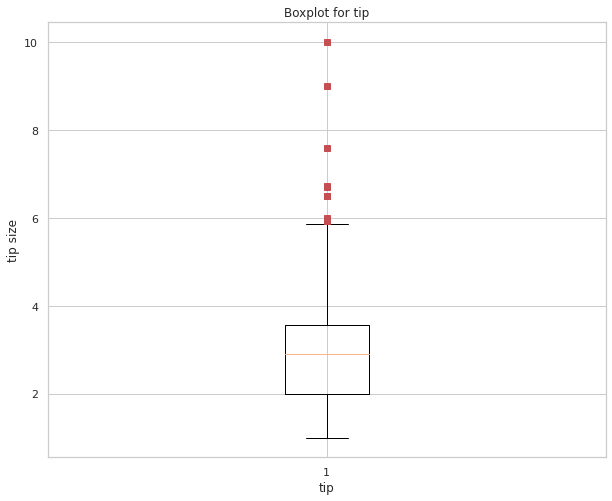

In [92]:
plt.boxplot(tips['tip'], # 주황선은 중앙선
            sym='rs') # outlier red square
plt.title('Boxplot for tip') 
plt.xlabel('tip', fontsize=12)
plt.ylabel('tip size', fontsize=12)
plt.show()

### seaborn을 활용한 시각화

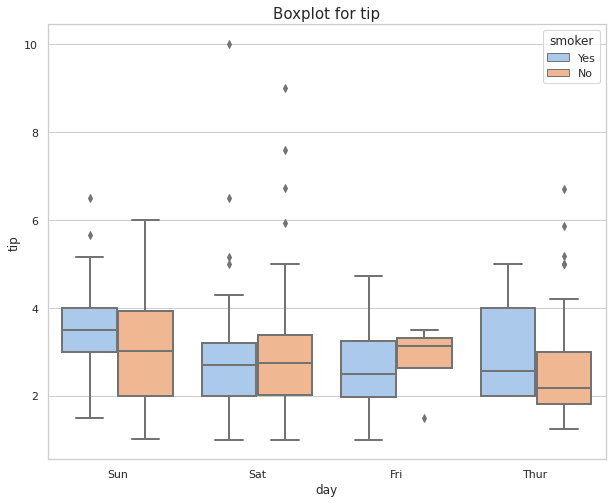

In [96]:
sns.boxplot(data=tips,
            x='day',
            y='tip',
            hue='smoker',
            linewidth=2,
            order=['Sun','Sat','Fri','Thur'])
plt.title('Boxplot for tip', fontsize=15) 
plt.show()